## Sales - Profit Prediction

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Sales.csv')
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,$ 3.00,$ 20.00,"$ 32,370.00",$ -,"$ 32,370.00","$ 16,185.00","$ 16,185.00",01-01-2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,$ 3.00,$ 20.00,"$ 26,420.00",$ -,"$ 26,420.00","$ 13,210.00","$ 13,210.00",01-01-2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,$ 3.00,$ 15.00,"$ 32,670.00",$ -,"$ 32,670.00","$ 21,780.00","$ 10,890.00",06-01-2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,$ 3.00,$ 15.00,"$ 13,320.00",$ -,"$ 13,320.00","$ 8,880.00","$ 4,440.00",06-01-2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,$ 3.00,$ 15.00,"$ 37,050.00",$ -,"$ 37,050.00","$ 24,700.00","$ 12,350.00",06-01-2014,6,June,2014


In [3]:
df.head(10)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,$ 3.00,$ 20.00,"$ 32,370.00",$ -,"$ 32,370.00","$ 16,185.00","$ 16,185.00",01-01-2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,$ 3.00,$ 20.00,"$ 26,420.00",$ -,"$ 26,420.00","$ 13,210.00","$ 13,210.00",01-01-2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,$ 3.00,$ 15.00,"$ 32,670.00",$ -,"$ 32,670.00","$ 21,780.00","$ 10,890.00",06-01-2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,$ 3.00,$ 15.00,"$ 13,320.00",$ -,"$ 13,320.00","$ 8,880.00","$ 4,440.00",06-01-2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,$ 3.00,$ 15.00,"$ 37,050.00",$ -,"$ 37,050.00","$ 24,700.00","$ 12,350.00",06-01-2014,6,June,2014
5,Government,Germany,Carretera,None,1513.0,$ 3.00,$ 350.00,"$ 529,550.00",$ -,"$ 529,550.00","$ 393,380.00","$ 136,170.00",12-01-2014,12,December,2014
6,Midmarket,Germany,Montana,None,921.0,$ 5.00,$ 15.00,"$ 13,815.00",$ -,"$ 13,815.00","$ 9,210.00","$ 4,605.00",03-01-2014,3,March,2014
7,Channel Partners,Canada,Montana,None,2518.0,$ 5.00,$ 12.00,"$ 30,216.00",$ -,"$ 30,216.00","$ 7,554.00","$ 22,662.00",06-01-2014,6,June,2014
8,Government,France,Montana,None,1899.0,$ 5.00,$ 20.00,"$ 37,980.00",$ -,"$ 37,980.00","$ 18,990.00","$ 18,990.00",06-01-2014,6,June,2014
9,Channel Partners,Germany,Montana,None,1545.0,$ 5.00,$ 12.00,"$ 18,540.00",$ -,"$ 18,540.00","$ 4,635.00","$ 13,905.00",06-01-2014,6,June,2014


In [4]:
df.shape

(700, 16)

In [5]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', 'Units Sold',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Segment                700 non-null    object 
 1   Country                700 non-null    object 
 2    Product               700 non-null    object 
 3    Discount Band         700 non-null    object 
 4   Units Sold             700 non-null    float64
 5    Manufacturing Price   700 non-null    object 
 6    Sale Price            700 non-null    object 
 7    Gross Sales           700 non-null    object 
 8    Discounts             700 non-null    object 
 9     Sales                700 non-null    object 
 10   COGS                  700 non-null    object 
 11   Profit                700 non-null    object 
 12  Date                   700 non-null    object 
 13  Month Number           700 non-null    int64  
 14   Month Name            700 non-null    object 
 15  Year  

In [7]:
df.tail()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
695,Small Business,France,Amarilla,High,2475.0,$ 260.00,$ 300.00,"$ 742,500.00","$ 111,375.00","$ 631,125.00","$ 618,750.00","$ 12,375.00",03-01-2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,$ 260.00,$ 300.00,"$ 163,800.00","$ 24,570.00","$ 139,230.00","$ 136,500.00","$ 2,730.00",10-01-2014,10,October,2014
697,Government,Mexico,Montana,High,1368.0,$ 5.00,$ 7.00,"$ 9,576.00","$ 1,436.40","$ 8,139.60","$ 6,840.00","$ 1,299.60",02-01-2014,2,February,2014
698,Government,Canada,Paseo,High,723.0,$ 10.00,$ 7.00,"$ 5,061.00",$ 759.15,"$ 4,301.85","$ 3,615.00",$ 686.85,04-01-2014,4,April,2014
699,Channel Partners,United States of America,VTT,High,1806.0,$ 250.00,$ 12.00,"$ 21,672.00","$ 3,250.80","$ 18,421.20","$ 5,418.00","$ 13,003.20",05-01-2014,5,May,2014


In [8]:
df.describe()

,Units Sold,Month Number,Year
count,700.000000,700.000000,700.000000
mean,1608.294286,7.900000,2013.750000
std,867.427859,3.377321,0.433322
min,200.000000,1.000000,2013.000000
25%,905.000000,5.750000,2013.750000
50%,1542.500000,9.000000,2014.000000
75%,2229.125000,10.250000,2014.000000
max,4492.500000,12.000000,2014.000000


## Missing Values

In [9]:
df.isnull().sum()

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
Units Sold               0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['segment', 'country', 'product', 'discount_band', 'units_sold',
       'manufacturing_price', 'sale_price', 'gross_sales', 'discounts',
       'sales', 'cogs', 'profit', 'date', 'month_number', 'month_name',
       'year'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   segment              700 non-null    object 
 1   country              700 non-null    object 
 2   product              700 non-null    object 
 3   discount_band        700 non-null    object 
 4   units_sold           700 non-null    float64
 5   manufacturing_price  700 non-null    object 
 6   sale_price           700 non-null    object 
 7   gross_sales          700 non-null    object 
 8   discounts            700 non-null    object 
 9   sales                700 non-null    object 
 10  cogs                 700 non-null    object 
 11  profit               700 non-null    object 
 12  date                 700 non-null    object 
 13  month_number         700 non-null    int64  
 14  month_name           700 non-null    object 
 15  year                 700 non-null    int

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df.dtypes

segment                        object
country                        object
product                        object
discount_band                  object
units_sold                    float64
manufacturing_price            object
sale_price                     object
gross_sales                    object
discounts                      object
sales                          object
cogs                           object
profit                         object
date                   datetime64[ns]
month_number                    int64
month_name                     object
year                            int64
dtype: object

In [16]:
text_cols = ['segment', 'country', 'product', 'discount_band', 'month_name']

for col in text_cols:
    df[col] = df[col].str.strip().str.lower()

In [17]:
df.duplicated().sum()

np.int64(0)

##         Logical Validation 

In [18]:
df[df['units_sold'] < 0]

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year


In [21]:
df[['sales', 'cogs']].dtypes

sales    object
cogs     object
dtype: object

In [22]:
df['sales'] = df['sales'].replace('[\$,]', '', regex=True)

df['cogs'] = df['cogs'].replace('[\$,]', '', regex=True)

In [23]:
df['sales'] = pd.to_numeric(df['sales'])
df['cogs'] = pd.to_numeric(df['cogs'])

In [24]:
df['calculated_profit'] = df['sales'] - df['cogs']

In [33]:
df[df['profit'] != df['calculated_profit']]

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year,calculated_profit
0,government,canada,carretera,none,1618.5,$ 3.00,$ 20.00,32370.0,-,32370.00,16185.0,"$ 16,185.00",2014-01-01,1,january,2014,16185.00
1,government,germany,carretera,none,1321.0,$ 3.00,$ 20.00,26420.0,-,26420.00,13210.0,"$ 13,210.00",2014-01-01,1,january,2014,13210.00
2,midmarket,france,carretera,none,2178.0,$ 3.00,$ 15.00,32670.0,-,32670.00,21780.0,"$ 10,890.00",2014-06-01,6,june,2014,10890.00
3,midmarket,germany,carretera,none,888.0,$ 3.00,$ 15.00,13320.0,-,13320.00,8880.0,"$ 4,440.00",2014-06-01,6,june,2014,4440.00
4,midmarket,mexico,carretera,none,2470.0,$ 3.00,$ 15.00,37050.0,-,37050.00,24700.0,"$ 12,350.00",2014-06-01,6,june,2014,12350.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,small business,france,amarilla,high,2475.0,$ 260.00,$ 300.00,742500.0,111375.00,631125.00,618750.0,"$ 12,375.00",2014-03-01,3,march,2014,12375.00
696,small business,mexico,amarilla,high,546.0,$ 260.00,$ 300.00,163800.0,24570.00,139230.00,136500.0,"$ 2,730.00",2014-10-01,10,october,2014,2730.00
697,government,mexico,montana,high,1368.0,$ 5.00,$ 7.00,9576.0,1436.40,8139.60,6840.0,"$ 1,299.60",2014-02-01,2,february,2014,1299.60
698,government,canada,paseo,high,723.0,$ 10.00,$ 7.00,5061.0,759.15,4301.85,3615.0,$ 686.85,2014-04-01,4,april,2014,686.85


## Check Sales Calculation

In [28]:
df.dtypes

segment                        object
country                        object
product                        object
discount_band                  object
units_sold                    float64
manufacturing_price            object
sale_price                     object
gross_sales                    object
discounts                      object
sales                         float64
cogs                          float64
profit                         object
date                   datetime64[ns]
month_number                    int64
month_name                     object
year                            int64
calculated_profit             float64
dtype: object

In [31]:
df[numeric_cols].isnull().sum()

gross_sales    0
discounts      0
sales          0
cogs           0
profit         0
dtype: int64

In [32]:
df[numeric_cols] = df[numeric_cols].fillna(0)

In [34]:
df.drop('calculated_profit', axis=1, inplace=True)

In [35]:
df['date'] = pd.to_datetime(df['date'])


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   segment              700 non-null    object        
 1   country              700 non-null    object        
 2   product              700 non-null    object        
 3   discount_band        700 non-null    object        
 4   units_sold           700 non-null    float64       
 5   manufacturing_price  700 non-null    object        
 6   sale_price           700 non-null    object        
 7   gross_sales          700 non-null    float64       
 8   discounts            700 non-null    object        
 9   sales                700 non-null    float64       
 10  cogs                 700 non-null    float64       
 11  profit               700 non-null    object        
 12  date                 700 non-null    datetime64[ns]
 13  month_number         700 non-null  

In [37]:
df.describe()

,units_sold,gross_sales,sales,cogs,date,month_number,year
count,700.000000,7.000000e+02,7.000000e+02,700.000000,700,700.000000,700.000000
mean,1608.294286,1.827594e+05,1.696091e+05,145475.211429,2014-04-28 21:36:00,7.900000,2013.750000
min,200.000000,1.799000e+03,1.655080e+03,918.000000,2013-09-01 00:00:00,1.000000,2013.000000
25%,905.000000,1.739175e+04,1.592800e+04,7490.000000,2013-12-24 06:00:00,5.750000,2013.750000
50%,1542.500000,3.798000e+04,3.554020e+04,22506.250000,2014-05-16 12:00:00,9.000000,2014.000000
75%,2229.125000,2.790250e+05,2.610775e+05,245607.500000,2014-09-08 12:00:00,10.250000,2014.000000
max,4492.500000,1.207500e+06,1.159200e+06,950625.000000,2014-12-01 00:00:00,12.000000,2014.000000
std,867.427859,2.542623e+05,2.367263e+05,203865.506118,NaN,3.377321,0.433322


## Top 5 Countries by Profit

In [38]:
df.groupby('country')['profit'].sum().sort_values(ascending=False)  

country
united states of america     $ 3,075.00  $ 2,286.00  $ 8,208.00  $ 14,105....
canada                       $ 16,185.00  $ 22,662.00  $ 13,327.50  $ 1,72...
germany                      $ 13,210.00  $ 4,440.00  $ 136,170.00  $ 4,60...
mexico                       $ 12,350.00  $ 12,350.00  $ 47,900.00  $ 4,87...
france                       $ 10,890.00  $ 18,990.00  $ 2,745.00  $ 9,020...
Name: profit, dtype: object

In [39]:
df.groupby('product')['profit'].sum().sort_values(ascending=False)

product
montana       $ 4,605.00  $ 22,662.00  $ 18,990.00  $ 13,90...
amarilla      $ 247,500.00  $ 17,577.00  $ 21,097.50  $ 18,...
velo          $ 2,986.00  $ 9,020.00  $ 19,449.00  $ 90,540...
paseo         $ 2,920.00  $ 4,870.00  $ 22,662.00  $ 90,540...
carretera     $ 16,185.00  $ 13,210.00  $ 10,890.00  $ 4,44...
vtt           $ 100,050.00  $ 25,542.00  $ 10,890.00  $ 4,4...
Name: profit, dtype: object

In [43]:
df['profit'] = df['profit'].replace('[\$,]', '', regex=True)

df['profit'] = pd.to_numeric(df['profit'], errors='coerce')

In [44]:
df['profit'].isna().sum()

np.int64(63)

In [45]:
df['profit'].fillna(0, inplace=True)

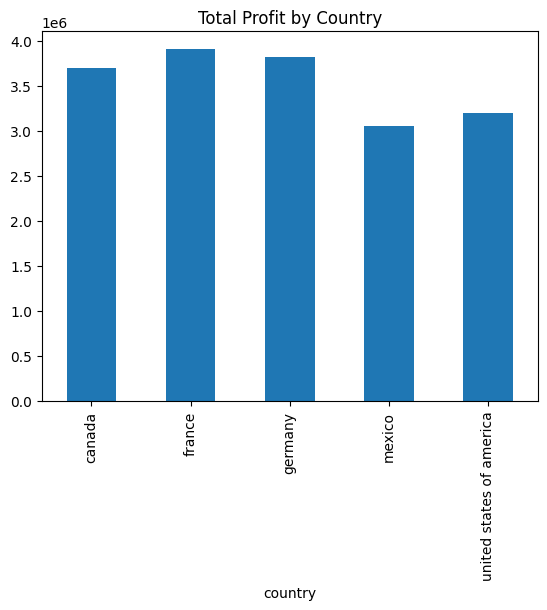

In [46]:
import matplotlib.pyplot as plt

df.groupby('country')['profit'].sum().plot(kind='bar')
plt.title("Total Profit by Country")
plt.show()

In [47]:
print("Total Sales:", df['sales'].sum())
print("Total Profit:", df['profit'].sum())
print("Total Units Sold:", df['units_sold'].sum())

Total Sales: 118726350.28999999
Total Profit: 17671023.54
Total Units Sold: 1125806.0


In [48]:
country_profit = df.groupby('country')['profit'].sum().sort_values(ascending=False)
print(country_profit)

country
france                      3906754.54
germany                     3820885.07
canada                      3693717.64
united states of america    3196443.18
mexico                      3053223.11
Name: profit, dtype: float64


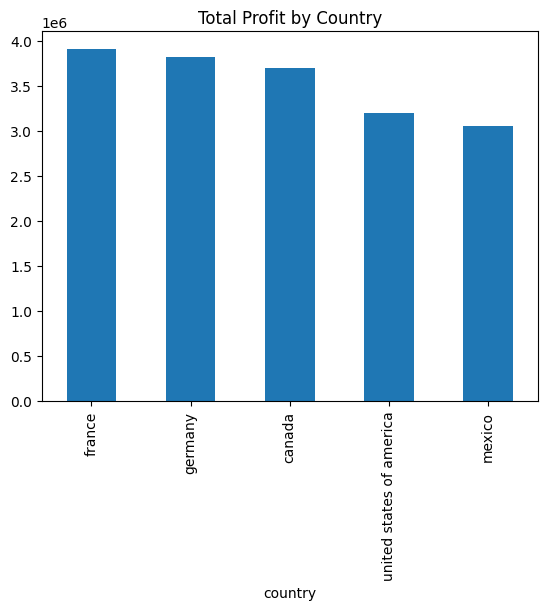

In [49]:
country_profit.plot(kind='bar')
plt.title("Total Profit by Country")
plt.show()

In [50]:
product_profit = df.groupby('product')['profit'].sum().sort_values(ascending=False)
print(product_profit)

product
paseo        4917986.71
vtt          3156348.02
amarilla     2936044.07
velo         2431448.72
montana      2171281.13
carretera    2057914.89
Name: profit, dtype: float64


In [51]:
df.groupby('segment')['profit'].sum().sort_values(ascending=False)

segment
government          11388173.18
small business       4143168.50
channel partners     1316803.14
midmarket             660103.09
enterprise            162775.63
Name: profit, dtype: float64

## Monthly Trend Analysis

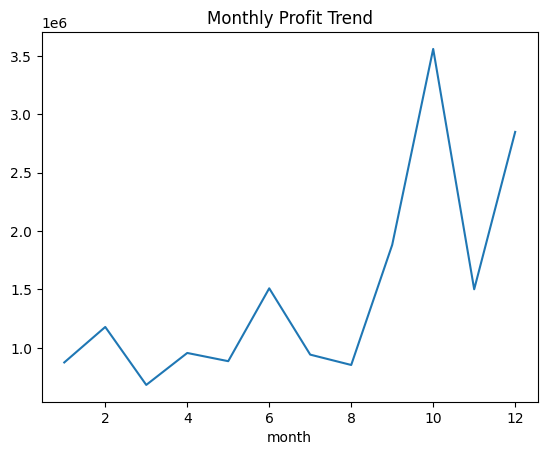

In [52]:
df['month'] = df['date'].dt.month

monthly_profit = df.groupby('month')['profit'].sum()

monthly_profit.plot(kind='line')
plt.title("Monthly Profit Trend")
plt.show()

In [53]:
df['profit_margin'] = (df['profit'] / df['sales']) * 100

In [54]:
df.groupby('product')['profit_margin'].mean().sort_values(ascending=False)

product
carretera    30.683605
amarilla     29.639482
paseo        28.835543
montana      27.445265
velo         27.150723
vtt          27.037171
Name: profit_margin, dtype: float64

In [60]:
X = df[['units_sold', 'manufacturing_price', 'sale_price', 'discounts', 'cogs']]
y = df['profit']    

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [64]:
X_train.dtypes

units_sold             float64
manufacturing_price     object
sale_price              object
discounts               object
cogs                   float64
dtype: object

In [65]:
X_train.head()

,units_sold,manufacturing_price,sale_price,discounts,cogs
82,2155.0,$ 10.00,$ 350.00,7542.50,560300.0
51,1143.0,$ 260.00,$ 7.00,-,5715.0
220,1683.0,$ 260.00,$ 7.00,589.05,8415.0
669,546.0,$ 5.00,$ 300.00,24570.00,136500.0
545,1186.0,$ 5.00,$ 300.00,42696.00,296500.0


In [68]:
print(df.columns.tolist())

['segment', 'country', 'product', 'discount_band', 'units_sold', 'manufacturing_price', 'sale_price', 'gross_sales', 'discounts', 'sales', 'cogs', 'profit', 'date', 'month_number', 'month_name', 'year', 'month', 'profit_margin']


In [70]:
print(df['manufacturing_price'].head(10))
print(df['profit'].head(10))

0    3.0
1    3.0
2    3.0
3    3.0
4    3.0
5    3.0
6    5.0
7    5.0
8    5.0
9    5.0
Name: manufacturing_price, dtype: float64
0     16185.0
1     13210.0
2     10890.0
3      4440.0
4     12350.0
5    136170.0
6      4605.0
7     22662.0
8     18990.0
9     13905.0
Name: profit, dtype: float64


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [73]:
# feature & target 
X = df.drop(['profit', 'date'], axis=1)
y = df['profit']

In [74]:
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
print(X.dtypes)

segment                 object
country                 object
product                 object
discount_band           object
units_sold             float64
manufacturing_price    float64
sale_price             float64
gross_sales            float64
discounts               object
sales                  float64
cogs                   float64
month_number             int64
month_name              object
year                     int64
month                    int32
profit_margin          float64
dtype: object


In [77]:
print(X.isnull().sum())

segment                0
country                0
product                0
discount_band          0
units_sold             0
manufacturing_price    0
sale_price             0
gross_sales            0
discounts              0
sales                  0
cogs                   0
month_number           0
month_name             0
year                   0
month                  0
profit_margin          0
dtype: int64


In [78]:
from sklearn.preprocessing import LabelEncoder

object_cols = ['segment', 'country', 'product', 'discount_band', 'month_name', 'discounts']

le = LabelEncoder()
for col in object_cols:
    if col in X.columns:
        X[col] = le.fit_transform(X[col].astype(str))

print("✅ Encoding done! Shape:", X.shape)

✅ Encoding done! Shape: (700, 16)


In [79]:
# Step 2: Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Step 3: Model Train karo
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("✅ R2 Score:", round(r2_score(y_test, y_pred), 4))
print("✅ MAE:", round(mean_absolute_error(y_test, y_pred), 2))

✅ R2 Score: 0.9911
✅ MAE: 2073.99


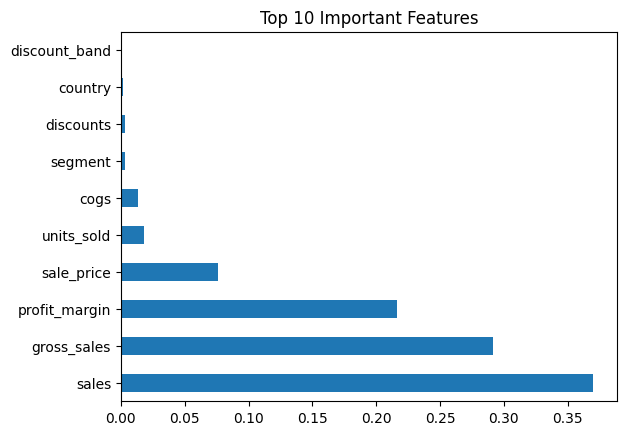

In [81]:
# Step 4: Feature Importance dekho
import pandas as pd
import matplotlib.pyplot as plt

feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

## Total Profit by segment 


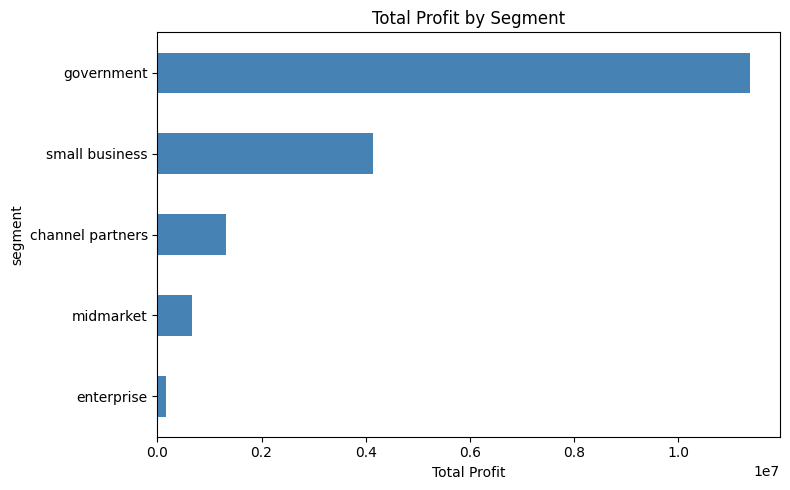

In [82]:
plt.figure(figsize=(8,5))
df.groupby('segment')['profit'].sum().sort_values().plot(kind='barh', color='steelblue')
plt.title("Total Profit by Segment")
plt.xlabel("Total Profit")
plt.tight_layout()
plt.show()

## total profit by country 

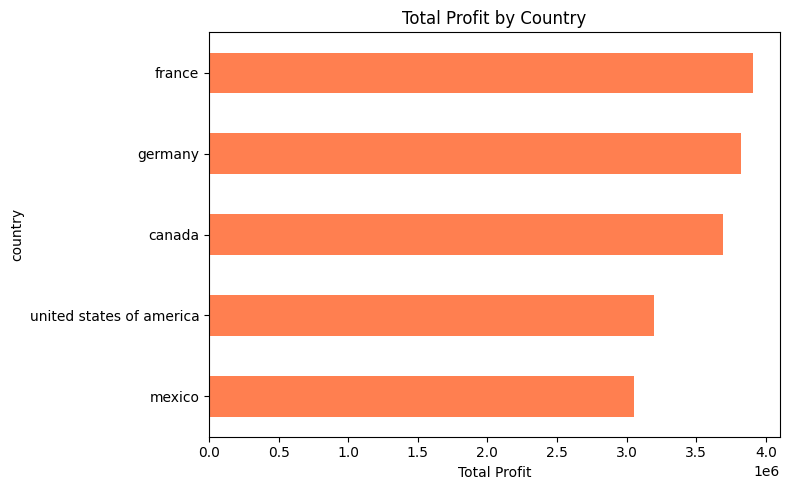

In [83]:
plt.figure(figsize=(8,5))
df.groupby('country')['profit'].sum().sort_values().plot(kind='barh', color='coral')
plt.title("Total Profit by Country")
plt.xlabel("Total Profit")
plt.tight_layout()
plt.show()

## Monthly Profit Trend

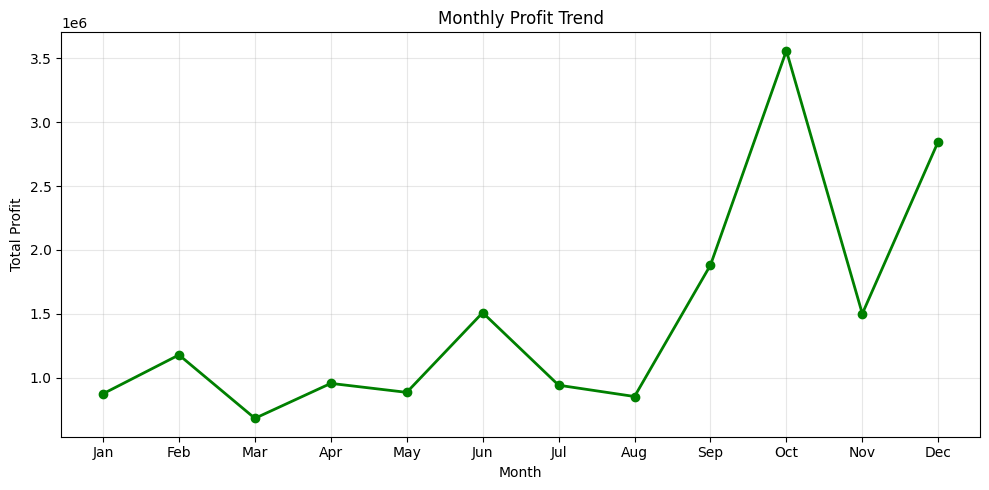

In [84]:
plt.figure(figsize=(10,5))
df.groupby('month_number')['profit'].sum().plot(kind='line', marker='o', color='green', linewidth=2)
plt.title("Monthly Profit Trend")
plt.xlabel("Month")
plt.ylabel("Total Profit")
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Total Profit by Product

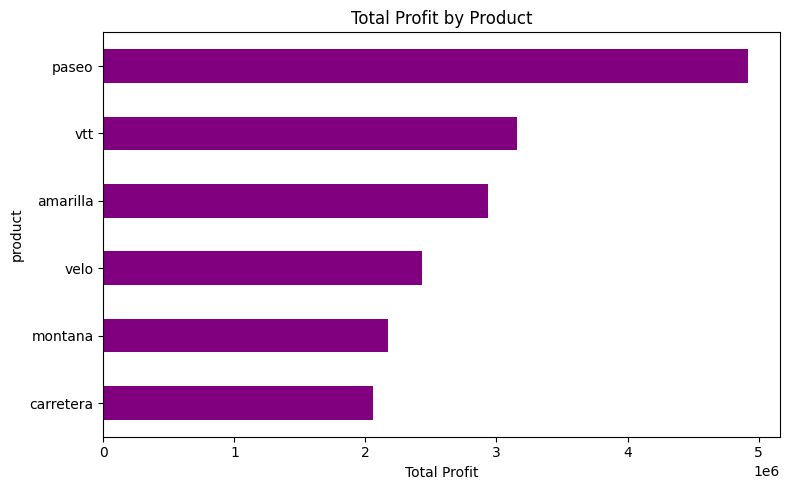

In [85]:
plt.figure(figsize=(8,5))
df.groupby('product')['profit'].sum().sort_values().plot(kind='barh', color='purple')
plt.title("Total Profit by Product")
plt.xlabel("Total Profit")
plt.tight_layout()
plt.show()

## Feature Engineering 

In [86]:
# New Feature 1: Profit Margin
df['profit_margin_pct'] = (df['profit'] / df['sales']) * 100

In [87]:
# New Feature 2: Revenue per Unit
df['revenue_per_unit'] = df['sales'] / df['units_sold']

In [90]:
df['discounts'] = pd.to_numeric(df['discounts'].astype(str).str.replace(r'[\$,\s]', '', regex=True), errors='coerce').fillna(0)
df['gross_sales'] = pd.to_numeric(df['gross_sales'].astype(str).str.replace(r'[\$,\s]', '', regex=True), errors='coerce').fillna(0)

In [91]:
df['profit_margin_pct'] = (df['profit'] / df['sales']) * 100
df['revenue_per_unit'] = df['sales'] / df['units_sold']
df['discount_impact'] = df['discounts'] / df['gross_sales'].replace(0, 1) * 100
print(df[['profit_margin_pct', 'revenue_per_unit', 'discount_impact']].head())

   profit_margin_pct  revenue_per_unit  discount_impact
0          50.000000              20.0              0.0
1          50.000000              20.0              0.0
2          33.333333              15.0              0.0
3          33.333333              15.0              0.0
4          33.333333              15.0              0.0


In [92]:
# Updated X with new features
X = df.drop(['profit', 'date'], axis=1)
y = df['profit']

# Encode categorical columns
object_cols = ['segment', 'country', 'product', 'discount_band', 'month_name', 'discounts']
le = LabelEncoder()
for col in object_cols:
    if col in X.columns:
        X[col] = le.fit_transform(X[col].astype(str))

X = X.fillna(0)

# Retrain model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

print("===== NEW MODEL RESULTS =====")
print(f"R2  Score : {round(r2_score(y_test, y_pred2), 4)}")
print(f"MAE       : {round(mean_absolute_error(y_test, y_pred2), 2)}")
print("=============================")

===== NEW MODEL RESULTS =====
R2  Score : 0.9915
MAE       : 1908.27


In [93]:
import pickle
with open('profit_prediction_model.pkl', 'wb') as f:
    pickle.dump(model2, f)
print("✅ Model saved as 'profit_prediction_model.pkl'")

✅ Model saved as 'profit_prediction_model.pkl'


In [94]:
# Model load 
with open('profit_prediction_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [95]:
# Test pridiction
test_pred = loaded_model.predict(X_test)
print("✅ Model loaded successfully!")
print(f"R2 Score after loading: {round(r2_score(y_test, test_pred), 4)}")

✅ Model loaded successfully!
R2 Score after loading: 0.9915
